In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
X = digits["data"]

print(X.shape)
X

(1797, 64)


array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

### Visualize

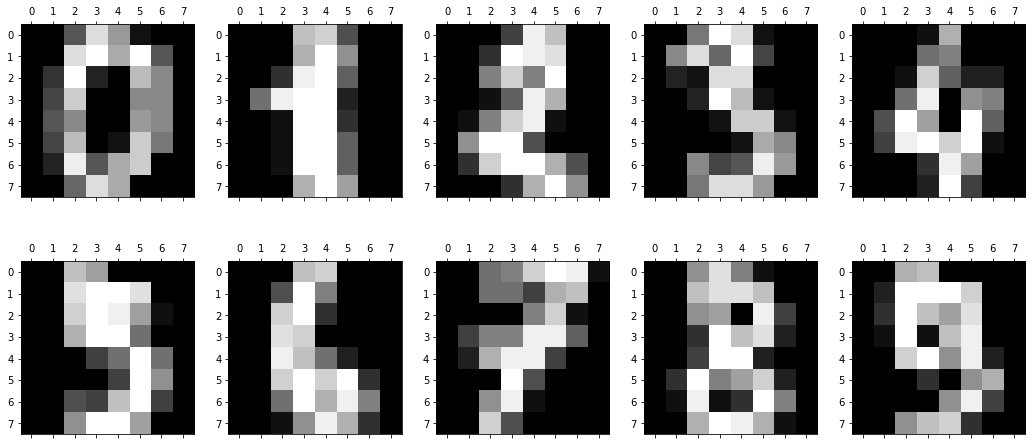

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(18, 8)

axes[0][0].matshow(X[0].reshape(8, 8))
axes[0][1].matshow(X[1].reshape(8, 8))
axes[0][2].matshow(X[2].reshape(8, 8))
axes[0][3].matshow(X[3].reshape(8, 8))
axes[0][4].matshow(X[4].reshape(8, 8))
axes[1][0].matshow(X[5].reshape(8, 8))
axes[1][1].matshow(X[6].reshape(8, 8))
axes[1][2].matshow(X[7].reshape(8, 8))
axes[1][3].matshow(X[8].reshape(8, 8))
axes[1][4].matshow(X[9].reshape(8, 8))

In [5]:
y = digits["target"]

print(y.shape)
y

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

## Preprocessing

In [6]:
X_mean = X.mean()

X = X - X_mean

X.mean(), X.min(), X.max()

(8.995463126623417e-17, -4.8841645798553142, 11.115835420144686)

In [7]:
from keras.utils import to_categorical

y_hot = to_categorical(y)

print(y.shape, y_hot.shape)

Using TensorFlow backend.
/Users/shaynekang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


(1797,) (1797, 10)


## Define Activation

### Sigmoid

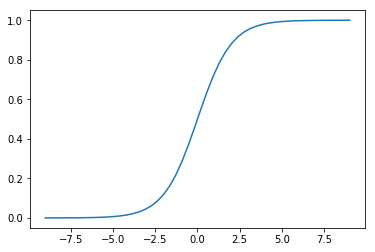

In [8]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid(xx)

plt.plot(xx, yy)

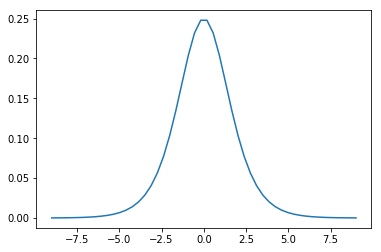

In [9]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

## Define Cross Entropy

In [10]:
def cross_entropy(actual, predict, eps=1e-5):
    actual = np.array(actual)
    predict = np.array(predict)

    clipped_predict = np.minimum(np.maximum(predict, eps), 1 - eps)

    loss = actual * np.log(clipped_predict) + (1 - actual) * np.log(1 - clipped_predict)
    
    return -1.0 * loss.mean()

## Build a Model

In [11]:
from time import time

def train(X, y, num_epoch, learning_rate, update_method):
    history = []

    start = time()

    w1 = np.random.uniform(low=-np.sqrt(6 / (64+100)),
                           high=+np.sqrt(6 / (64+100)),
                           size=(64, 100))

    w2 = np.random.uniform(low=-np.sqrt(6 / (100+10)),
                           high=+np.sqrt(6 / (100+10)),
                           size=(100, 10))

    for epoch in range(num_epoch):
        # Forward Propagation
        z1 = X.dot(w1)
        a1 = sigmoid(z1)
        z2 = a1.dot(w2)
        a2 = sigmoid(z2)

        y_predict = np.argmax(a2, axis=1)

        accuracy = (y_predict == y).mean()
        loss = cross_entropy(a2, y_hot)

        if epoch % (num_epoch // 10) == 0:
            print("{0:3} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

        history.append({
            'epoch': epoch,
            'elapsed': time() - start,
            'accuracy': accuracy,
            'loss': loss,
        })

        # Backpropagation
        d2 = (a2 - y_hot)
        d1 = d2.dot(w2.T) * sigmoid_derivative(z1)

        # Weight gradients
        dw2 = a1.T.dot(d2)
        dw1 = X.T.dot(d1)

        w1, w2 = update_method(epoch, learning_rate, w1, w2, dw1, dw2)

    print("----" * 10)
    print("{0:3} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))
    
    history = pd.DataFrame(history)
    history = history[["epoch", "elapsed", "accuracy", "loss"]]

    return history

### Stochastic Gradient Descent

In [12]:
# Write your code here!

### Momentum

In [13]:
# Write your code here!

### Nesterov Momentum

In [14]:
# Write your code here!

### AdaGrad

In [15]:
# Write your code here!

### RMSProp

In [16]:
# Write your code here!

### Adam

In [18]:
## Write your code here!